In [1]:
import pandas as pd
import math
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('tmdb_movies_full.csv', sep = ';')
df.head()

,title,id,adult,budget,genres,homepage,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,keywords,cast,crew
0,Escape Room,522681.0,False,9000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",https://www.escaperoom.movie/,en,Escape Room,Six strangers find themselves in circumstances...,39.789,...,155712077.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Find The Clues Or Die,6.544,3961.0,"[{'id': 483, 'name': 'riddle'}, {'id': 520, 'n...","[{'adult': False, 'gender': 1, 'id': 1353827, ...","[{'adult': False, 'gender': 2, 'id': 6041, 'kn..."
1,Rust Creek,561362.0,False,750000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://www.rustcreek.com,en,Rust Creek,When an overachieving college senior makes a w...,20.718,...,0.0,108.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Choose your prey carefully,6.409,248.0,"[{'id': 798, 'name': 'sheriff'}, {'id': 3291, ...","[{'adult': False, 'gender': 1, 'id': 1345419, ...","[{'adult': False, 'gender': 0, 'id': 17854, 'k..."
2,American Hangman,567738.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,en,American Hangman,An unidentified man posts a live feed on socia...,7.255,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A new kind of trial,6.100,120.0,"[{'id': 1930, 'name': 'kidnapping'}, {'id': 17...","[{'adult': False, 'gender': 2, 'id': 55636, 'k...","[{'adult': False, 'gender': 2, 'id': 7413, 'kn..."
3,A Dog's Way Home,508763.0,False,18000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 12, 'name...",http://www.adogswayhome.movie/,en,A Dog's Way Home,"The adventure of Bella, a dog who embarks on a...",35.079,...,17643857.0,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A lot can happen between lost and found.,7.309,941.0,"[{'id': 818, 'name': 'based on novel or book'}...","[{'adult': False, 'gender': 1, 'id': 15852, 'k...","[{'adult': False, 'gender': 2, 'id': 1270, 'kn..."
4,The Upside,440472.0,False,37500000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.theupside.movie/,en,The Upside,Phillip is a wealthy quadriplegic who needs a ...,25.958,...,111353135.0,126.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Based on a true story.,7.117,1026.0,"[{'id': 9672, 'name': 'based on true story'}, ...","[{'adult': False, 'gender': 2, 'id': 55638, 'k...","[{'adult': False, 'gender': 2, 'id': 29, 'know..."


## Análises preliminares

**Uma análise inicial para conhecer um pouco do dataset e das features.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5683 non-null   object 
 1   id                    5682 non-null   float64
 2   adult                 5675 non-null   object 
 3   budget                5682 non-null   float64
 4   genres                5682 non-null   object 
 5   homepage              2334 non-null   object 
 6   original_language     5682 non-null   object 
 7   original_title        5682 non-null   object 
 8   overview              5679 non-null   object 
 9   popularity            5682 non-null   float64
 10  production_companies  5682 non-null   object 
 11  production_countries  5682 non-null   object 
 12  release_date          5680 non-null   object 
 13  revenue               5682 non-null   float64
 14  runtime               5680 non-null   float64
 15  spoken_languages     

### Estatísticas iniciais

In [4]:
df.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,5.682000e+03,5.682000e+03,5682.000000,5.682000e+03,5680.000000,5682.000000,5682.000000
mean,1.351257e+05,2.750017e+07,25.964389,7.710265e+07,106.641725,6.159924,791.592749
std,2.090113e+05,4.129551e+07,51.370198,1.658777e+08,22.103886,1.171423,1466.281691
min,5.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9.678250e+03,0.000000e+00,5.626591,0.000000e+00,94.000000,5.700000,63.000000
50%,2.317050e+04,1.200000e+07,14.398678,1.310084e+07,103.000000,6.300000,262.500000
75%,1.785658e+05,3.700000e+07,30.044424,8.213858e+07,117.000000,6.900000,834.750000
max,1.033107e+06,3.800000e+08,1836.272000,2.797801e+09,338.000000,10.000000,22126.000000


In [5]:
#df.select_dtypes('object').describe()
df.describe(include = 'O')

,title,adult,genres,homepage,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,keywords,cast,crew
count,5683,5675,5682,2334,5682,5682,5679,5682,5682,5680,5682,5682,4667,5682,5675,5675
unique,5644,1,1550,2304,39,5641,5667,4518,586,3742,678,3,4629,4952,5637,5648
top,Demonic,False,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,en,Trust,"In the near future, Cameron Turner is diagnose...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2021-09-10,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,[],[],[]
freq,2,5675,370,4,5375,2,2,364,2977,10,3171,5674,4,551,20,9


No describe para as variáveis categóricas podemos ver contagem de dados, valores únicos, o valor mais recorrente e sua frequência

### Descrição das variáveis

- id: código do filme.
- title: Nome do filme.
- adult: Se o filme é de faixa etária adulta +18.
- budget: orçamento do filme em dólares.
- genres: lista de dicionários com os gêneros associados ao filme.
- homepage: site oficial do filme.
- original_language: idioma original do filme.
- original_title: título original do filme.
- overview: sinopse do filme.
- popularity: pontuação dada pelo TMDB.
- production_companies: produtoras envolvidas na produção.
- production_countries: lista de dicionários da nacionalidade das produtoras envolvidas.
- release_date: data oficial de lançamento.
- revenue: receita total do filme em dólares.
- runtime: duração do filme em minutos.
- spoken_languages: idiomas falados no filme.
- status: situação do filme (lançado, anunciado,etc)
- tagline: slogan do filme.
- vote_average: avaliação média do filme.
- vote_count: número de votos contabilizados.
- keywords: palavras-chaves associadas ao filme.
- cast: elenco do filme.
- crew: equipe técnica e produção.

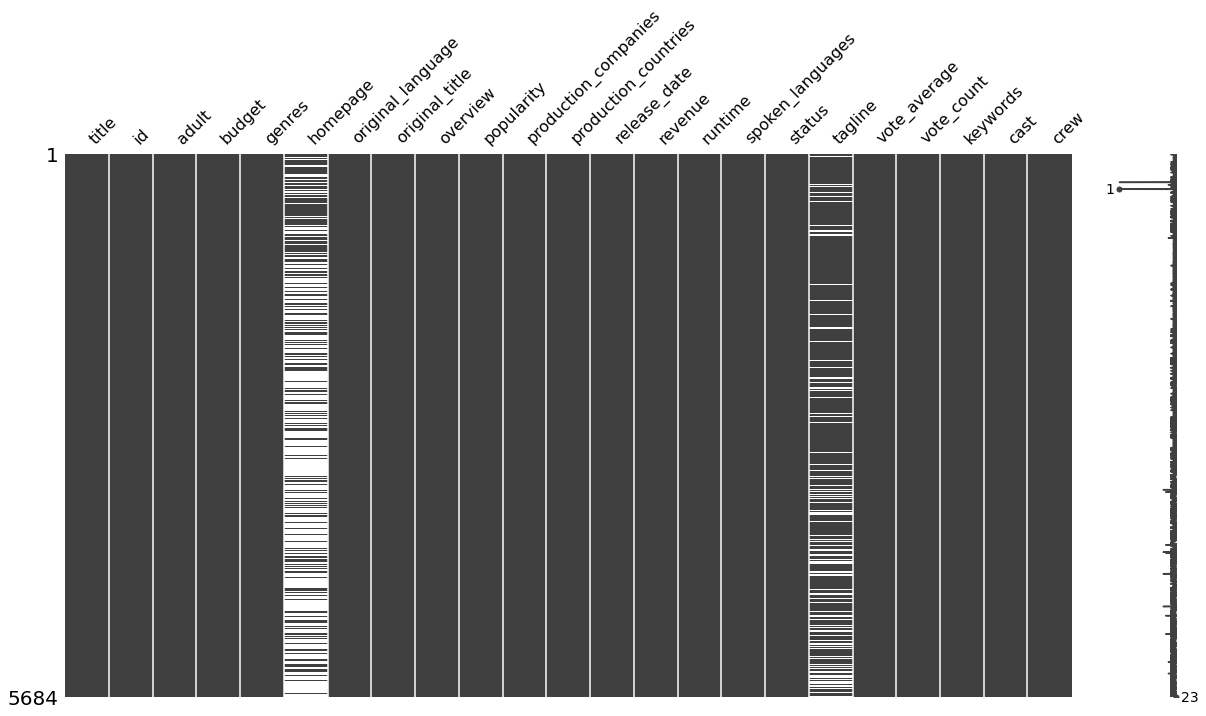

In [6]:
# visualização dos dados faltantes em cada coluna
missingno.matrix(df, figsize = (20,10));

In [7]:
# dados faltantes em ordem decrescente
df.isna().sum().sort_values(ascending = False)

homepage                3350
tagline                 1017
crew                       9
adult                      9
cast                       9
overview                   5
runtime                    4
release_date               4
keywords                   2
vote_count                 2
vote_average               2
status                     2
spoken_languages           2
production_countries       2
revenue                    2
id                         2
production_companies       2
popularity                 2
original_title             2
original_language          2
genres                     2
budget                     2
title                      1
dtype: int64

In [8]:
# percentual de dados faltantes por colunas
linhas, colunas = df.shape
perc_faltantes = df.isna().sum()/linhas * 100
perc_faltantes.sort_values(ascending = False)

homepage                58.937368
tagline                 17.892329
crew                     0.158339
adult                    0.158339
cast                     0.158339
overview                 0.087966
runtime                  0.070373
release_date             0.070373
keywords                 0.035186
vote_count               0.035186
vote_average             0.035186
status                   0.035186
spoken_languages         0.035186
production_countries     0.035186
revenue                  0.035186
id                       0.035186
production_companies     0.035186
popularity               0.035186
original_title           0.035186
original_language        0.035186
genres                   0.035186
budget                   0.035186
title                    0.017593
dtype: float64

### Dados duplicados

In [9]:
# o id é o principal identificador dos filmes assim, está é a variável para considerar a duplicidade
df.duplicated(subset = ['id']).sum()

20

In [10]:
df.drop_duplicates(subset = ['id'], inplace = True)

### Análise das feautures

In [11]:
df.shape

(5664, 23)

In [12]:
df.budget.describe()

count    5.663000e+03
mean     2.746794e+07
std      4.130979e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.150000e+07
75%      3.600000e+07
max      3.800000e+08
Name: budget, dtype: float64

<AxesSubplot:>

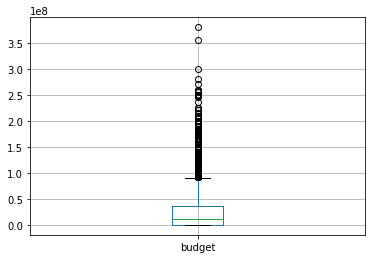

In [13]:
df.boxplot('budget')

A variável de orçamento possui muitos outliers, os dados apresentam um range muito grande de 0 até 380 milhoes (dólares). Pelo cálculo outlier, no boxplot, se observa que acima de 100 milhoes é considerado outlier. No percentil mostra que 75% dos dados estão abaixo de 36 milhões. Os percentis e o boxplot demonstram uma esperada distribuição não normal, com assimetria positiva, os dados de concentram em valores menores.

In [14]:
df.genres.head()

0    [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
1    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
2                     [{'id': 53, 'name': 'Thriller'}]
3    [{'id': 18, 'name': 'Drama'}, {'id': 12, 'name...
4    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
Name: genres, dtype: object

In [15]:
df.genres.describe()

count                              5663
unique                             1549
top       [{"id": 18, "name": "Drama"}]
freq                                368
Name: genres, dtype: object

Nota-se que cada gênero (valor do dicionario) possui seu id (chave do dicionário), e um filme pode conter uma lista de gêneros. Posteriormente podemos transformar esta coluna, cada gênero se torna mais uma feature, sendo uma variável binária , ou seja, se o filme apresenta este gênero a linha deste fica com valor True (1).

In [16]:
df.homepage.head()

0     https://www.escaperoom.movie/
1          http://www.rustcreek.com
2                               NaN
3    http://www.adogswayhome.movie/
4       http://www.theupside.movie/
Name: homepage, dtype: object

Esta é uma variável que poderá ser descartada, pois o site não parece ter valor para indicação de um filme. Além de que é uma feature que possui muitos valores nulos, cerca de 60%.

In [17]:
df.id.head()

0    522681.0
1    561362.0
2    567738.0
3    508763.0
4    440472.0
Name: id, dtype: float64

In [18]:
nulos = df['id'].isnull()
df.loc[nulos]

,title,id,adult,budget,genres,homepage,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,keywords,cast,crew
299,No films had been released on this date as res...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Esta linha de valores nulos serão excluídas pois quase todas as variaveis estão nulas

In [19]:
df.dropna(subset = ['id'], inplace = True)
df['id'].isnull().sum()

0

In [20]:
df.id = df.id.astype('int64')

Está é a chave de identificação do filme não faz sentido analisá-la, somente uma conversão para inteiro.

In [21]:
df.keywords.head()

0    [{'id': 483, 'name': 'riddle'}, {'id': 520, 'n...
1    [{'id': 798, 'name': 'sheriff'}, {'id': 3291, ...
2    [{'id': 1930, 'name': 'kidnapping'}, {'id': 17...
3    [{'id': 818, 'name': 'based on novel or book'}...
4    [{'id': 9672, 'name': 'based on true story'}, ...
Name: keywords, dtype: object

Uma coluna semelhante a de gêneros, mas aqueles são bem definidos, já as palavras chaves são bem aleatórias, assim não receberá o mesmo tratamento

In [22]:
df.original_language.sample(5)

3822    en
159     en
3056    en
1682    en
2333    en
Name: original_language, dtype: object

In [23]:
df.original_language.isna().sum()

0

In [24]:
print(df.original_language.unique(),'total de idiomas:',df.original_language.nunique())

['en' 'fr' 'es' 'mk' 'it' 'bs' 'ja' 'zh' 'de' 'hi' 'ru' 'ko' 'te' 'cn'
 'nl' 'ta' 'sv' 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl'
 'he' 'ar' 'vi' 'ky' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el'] total de idiomas: 39


In [25]:
df.original_language.value_counts()

en    5356
fr      73
es      35
zh      27
de      27
hi      19
ja      16
it      15
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
no       1
sl       1
ps       1
ky       1
vi       1
xx       1
pl       1
af       1
nb       1
tr       1
is       1
hu       1
te       1
bs       1
mk       1
el       1
Name: original_language, dtype: int64

Há uma variedade de idiomas, mas, como se imagina são predominantemente em inglês.

In [26]:
df.original_title.sample(5)

3854    For Greater Glory - The True Story of Cristiada
647                                   12 Mighty Orphans
2453                          Forgetting Sarah Marshall
3468                                Killing Them Softly
5344                                           Not Cool
Name: original_title, dtype: object

In [27]:
df.original_title.isna().sum()

0

In [28]:
df.original_title.nunique()

5641

In [29]:
df.shape

(5663, 23)

Os títulos originais, teoricamente, deveriam possuir a mesma quantidade do numero de filmes (linhas), mas tem um pouco menos. Pode estar ocorrendo com filmes que tem continuações (parte 1, parte 2, etc) ou remakes, e tem mesmo título.

In [30]:
df.original_title.value_counts()

Diary of a Wimpy Kid       2
After                      2
Fortress                   2
Point Blank                2
Mortal Kombat              2
                          ..
The Thomas Crown Affair    1
Dick Tracy                 1
1947: Earth                1
The Cable Guy              1
My Date with Drew          1
Name: original_title, Length: 5641, dtype: int64

In [31]:
# realizando contagem de titulos de filmes e verificando os que aparecem mais de uma vez
filmes_cont = df.original_title.value_counts()
filmes_cont[filmes_cont>1].index

Index(['Diary of a Wimpy Kid', 'After', 'Fortress', 'Point Blank',
       'Mortal Kombat', 'The Misfits', 'Charlie's Angels', 'Trust',
       'Cinderella', 'Awake', 'Burn', 'Dune', 'Black Christmas', 'Aladdin',
       'Demonic', 'Little Women', 'Batman', 'Out of the Blue', 'Hellboy',
       'Shaft', 'West Side Story', 'Wrong Turn'],
      dtype='object')

In [32]:
indices_filmes_cont = []

# vamos iterar sobre a lista com titulo desses filmes e procurar o seu indice no dataframe
for i in filmes_cont[filmes_cont>1].index:
    
    indice = df.loc[df.original_title == i].index
    
    # como estes filmes aparecem mais de uma vez o loc retorna uma lista de indices
    for k in indice:
        indices_filmes_cont.append(k)
        
# verificando as informações dos filmes de títulos que aparecem mais de uma vez
df.loc[indices_filmes_cont]

,title,id,adult,budget,genres,homepage,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,keywords,cast,crew
854,Diary of a Wimpy Kid,774741,False,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",https://www.disneyplus.com/movies/diary-of-a-w...,en,Diary of a Wimpy Kid,Greg Heffley is a scrawny but ambitious kid wi...,74.897000,...,0.000000e+00,58.0,"[{'english_name': 'Danish', 'iso_639_1': 'da',...",Released,New school. Old cheese.,6.300,279.0,"[{'id': 13035, 'name': 'middle school'}]","[{'adult': False, 'gender': 2, 'id': 2239159, ...","[{'adult': False, 'gender': 2, 'id': 32608, 'k..."
3406,Diary of a Wimpy Kid,33217,False,15000000.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",http://www.fox.co.uk/diary-of-a-wimpy-kid,en,Diary of a Wimpy Kid,"Greg Heffley is headed for big things, but fir...",21.095489,...,7.570050e+07,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"It's not a diary, it's a movie.",5.900,355.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{'adult': False, 'gender': 2, 'id': 89819, 'k...","[{'adult': False, 'gender': 1, 'id': 1720, 'kn..."
60,After,537915,False,14000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,en,After,"Tessa Young is a dedicated student, dutiful da...",236.434000,...,6.949759e+07,106.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"After your first, life is never the same.",7.164,7370.0,"[{'id': 818, 'name': 'based on novel or book'}...","[{'adult': False, 'gender': 2, 'id': 1753914, ...","[{'adult': False, 'gender': 1, 'id': 5914, 'kn..."
5373,After,118612,False,0.0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 53, ""...",NaN,en,After,When two bus crash survivors awake to discover...,4.596157,...,0.000000e+00,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,5.600,63.0,"[{""id"": 732, ""name"": ""coma""}, {""id"": 14541, ""n...","[{'adult': False, 'gender': 2, 'id': 54815, 'k...","[{'adult': False, 'gender': 0, 'id': 556038, '..."
872,Fortress,826749,False,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,en,Fortress,The story revolves around a top-secret resort ...,63.540000,...,0.000000e+00,100.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,This prison has no bars.,6.119,261.0,[],"[{'adult': False, 'gender': 2, 'id': 57171, 'k...","[{'adult': False, 'gender': 2, 'id': 17210, 'k..."
3749,Fortress,12088,False,8000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",NaN,en,Fortress,A futuristic prison movie. Protagonist and wif...,8.708229,...,6.739141e+06,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The high-tech prison thirty stories below grou...,5.700,168.0,"[{""id"": 378, ""name"": ""prison""}, {""id"": 679, ""n...","[{'adult': False, 'gender': 2, 'id': 38559, 'k...","[{'adult': False, 'gender': 2, 'id': 3119, 'kn..."
121,Point Blank,531503,False,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://www.netflix.com/title/80221677,en,Point Blank,A nurse is forced to spring a wounded murder s...,15.865000,...,0.000000e+00,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A hell of a day. A hell of a pair.,6.053,456.0,"[{'id': 9714, 'name': 'remake'}]","[{'adult': False, 'gender': 2, 'id': 53650, 'k...","[{'adult': False, 'gender': 1, 'id': 6479, 'kn..."
4847,Point Blank,26039,False,2500000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,en,Point Blank,"After being double-crossed and left for dead, ...",5.164423,...,3.200000e+06,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,There are two kinds of people in his up-tight ...,7.100,95.0,"[{""id"": 3859, ""name"": ""alcatraz""}, {""id"": 9748...","[{'adult': False, 'gender': 2, 'id': 18391, 'k...","[{'adult': False, 'gender': 2, 'id': 1222, 'kn..."
599,Mortal Kombat,460465,False,20000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 14, '

Conforme dito anteriormente o id do filme é o principal identificador desta base. Para confirmar se há duplicidade vamos verificar o release_date (data de lançamento).

In [33]:
df.loc[indices_filmes_cont,['id', 'original_title', 'release_date']]

,id,original_title,release_date
854,774741,Diary of a Wimpy Kid,2021-12-03
3406,33217,Diary of a Wimpy Kid,2010-03-19
60,537915,After,2019-04-11
5373,118612,After,2012-08-27
872,826749,Fortress,2021-12-17
3749,12088,Fortress,1992-09-30
121,531503,Point Blank,2019-07-12
4847,26039,Point Blank,1967-08-30
599,460465,Mortal Kombat,2021-04-07
2981,9312,Mortal Kombat,1995-08-18


A variável release_date nos mostra que há nome de títulos iguais devido a remakes ou continuações. Assim, serão mantidos estes dados.

In [34]:
df.overview.head()

0    Six strangers find themselves in circumstances...
1    When an overachieving college senior makes a w...
2    An unidentified man posts a live feed on socia...
3    The adventure of Bella, a dog who embarks on a...
4    Phillip is a wealthy quadriplegic who needs a ...
Name: overview, dtype: object

In [122]:
df.shape

(5663, 23)

In [123]:
df.overview.nunique()

5660

O numero de linhas totais são 5663, então há valores faltantes.

In [36]:
df.overview.describe()

count                                                  5660
unique                                                 5660
top       Six strangers find themselves in circumstances...
freq                                                      1
Name: overview, dtype: object

In [37]:
df.overview.isnull().sum()

3

In [38]:
df[df.overview.isnull()]

,title,id,adult,budget,genres,homepage,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,keywords,cast,crew
3537,Chiamatemi Francesco - Il Papa della gente,370980,False,15000000.0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,...,0.0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,7.3,12.0,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...","[{'adult': False, 'gender': 2, 'id': 18478, 'k...","[{'adult': False, 'gender': 2, 'id': 59911, 'k..."
5021,"To Be Frank, Sinatra at 100",459488,False,2.0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,en,"To Be Frank, Sinatra at 100",NaN,0.050625,...,0.0,NaN,[],Released,NaN,0.0,0.0,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","[{'adult': False, 'gender': 0, 'id': 1354401, ...","[{'adult': False, 'gender': 0, 'id': 1253596, ..."
5312,Food Chains,292539,False,913000.0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,de,Food Chains,NaN,0.795698,...,0.0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,7.4,8.0,[],"[{'adult': False, 'gender': 2, 'id': 2178, 'kn...","[{'adult': False, 'gender': 1, 'id': 52605, 'k..."


In [39]:
###########################################################################################

In [40]:
df.popularity.head()

0    39.789
1    20.718
2     7.255
3    35.079
4    25.958
Name: popularity, dtype: float64

In [41]:
df.popularity.describe()

count    5663.000000
mean       25.841790
std        51.132411
min         0.000000
25%         5.585197
50%        14.376463
75%        29.949651
max      1836.272000
Name: popularity, dtype: float64

<AxesSubplot:>

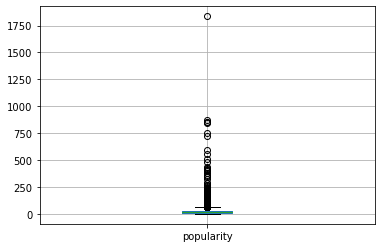

In [42]:
df.boxplot('popularity')

Há valores muito discrepantes, a média é 25,8, o desvio padrão é 51, e 75% dos valores estão abaixo de 29,9, sendo o valor máximo é 1836. O range dos últimos 25% é muito grande. Se pesquisando sobre esta métrica, existentem outras variáveis que a influenciam que não estão presentes do dataset (fonte: https://developers.themoviedb.org/3/getting-started/popularity), então, os valores podem variar muito. Números altos representam que o filme foi bem visto, votado e tem muita popularidade. Estes outliers devem ser mantidos pois indicam uma característica importante para indicação.

In [43]:
df.production_companies.head()

0    [{'id': 5, 'logo_path': '/lieeAioEBVsgsoDT9HIC...
1    [{'id': 70784, 'logo_path': '/17G3JkSIjyFBbvSk...
2    [{'id': 806, 'logo_path': '/kcNh09qqR2Pkw1JAzR...
3    [{'id': 5, 'logo_path': '/lieeAioEBVsgsoDT9HIC...
4    [{'id': 308, 'logo_path': '/e8F3mQM7DkJ5SfYYDp...
Name: production_companies, dtype: object

In [44]:
df.production_companies[0]

"[{'id': 5, 'logo_path': '/lieeAioEBVsgsoDT9HICrdt5iRa.png', 'name': 'Columbia Pictures', 'origin_country': 'US'}, {'id': 34, 'logo_path': '/GagSvqWlyPdkFHMfQ3pNq6ix9P.png', 'name': 'Sony Pictures', 'origin_country': 'US'}, {'id': 333, 'logo_path': '/5xUJfzPZ8jWJUDzYtIeuPO4qPIa.png', 'name': 'Original Film', 'origin_country': 'US'}]"

Uma variável composta por uma lista de dicionário com informações da(s) produtora(s)

In [45]:
df.production_companies.describe()

count     5663
unique    4509
top         []
freq       364
Name: production_companies, dtype: object

Embora production_companies não apareça valores nulos pelo método isnull, pelo describe vemos que há valores vazios e que foram preenchidos por '[]'

In [46]:
df.release_date.head()

0    2019-01-03
1    2019-01-04
2    2019-01-04
3    2019-01-10
4    2019-01-10
Name: release_date, dtype: object

Esta variável é uma data mas está no tipo object, vamos converter para data para poder analisar de forma temporal

In [47]:
df.release_date = pd.to_datetime(df.release_date, format = '%Y-%m-%d')

In [48]:
df.release_date.head()

0   2019-01-03
1   2019-01-04
2   2019-01-04
3   2019-01-10
4   2019-01-10
Name: release_date, dtype: datetime64[ns]

In [49]:
df.release_date.describe()

C:\Users\prpau\AppData\Local\Temp\ipykernel_15652\1602273724.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.release_date.describe()


count                    5661
unique                   3741
top       2006-01-01 00:00:00
freq                       10
first     1916-09-04 00:00:00
last      2022-11-10 00:00:00
Name: release_date, dtype: object

popularity: pontuação dada pelo TMDB.
production_companies: produtoras envolvidas na produção.
production_countries: lista de dicionários da nacionalidade das produtoras envolvidas.
release_date: data oficial de lançamento.
revenue: receita total do filme em dólares.
runtime: duração do filme em minutos.
spoken_languages: idiomas falados no filme.
status: situação do filme (lançado, anunciado,etc)
tagline: slogan do filme.
vote_average: avaliação média do filme.
vote_count: número de votos contabilizados.
keywords: palavras-chaves associadas ao filme.
cast: elenco do filme.
crew: equipe técnica e produção.

In [50]:
df.revenue.sample(5)

1859     34808403.0
5229     40000000.0
3195    151668774.0
3387            0.0
5219     17985893.0
Name: revenue, dtype: float64

In [51]:
df.revenue.isna().sum()

0

In [52]:
df.revenue.describe()

count    5.663000e+03
mean     7.690986e+07
std      1.657902e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.300000e+07
75%      8.162363e+07
max      2.797801e+09
Name: revenue, dtype: float64

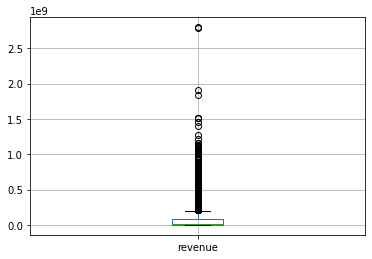

In [53]:
df.boxplot('revenue');

13000000.0

Variável semelhante a budget, com valores bem discrepantes. A média é cerca de 76,9 milhões, muito influenciada pelos valores extremos, como pode se observar pela mediana de 13 milhões e os 75% dos valores abaixo de 81,6 milhões. O valor máximo chega a mais de 2 bilhões.

In [63]:
###############

In [56]:
df.runtime.sample(5)

4028     87.0
3804    101.0
2737     85.0
990     113.0
3916     84.0
Name: runtime, dtype: float64

In [57]:
df.runtime.isna().sum()

2

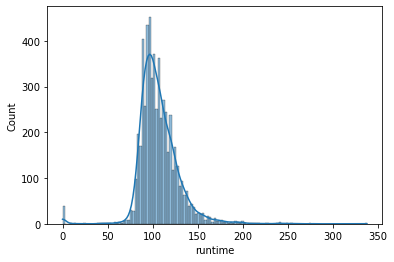

In [58]:
sns.histplot(df.runtime, kde=True);

<AxesSubplot:>

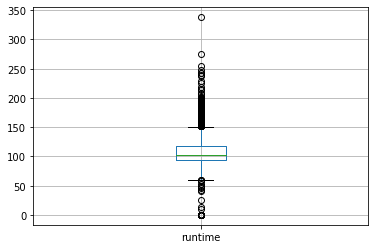

In [59]:
df.boxplot('runtime')

In [60]:
df.runtime.describe()

count    5661.000000
mean      106.655891
std        22.120189
min         0.000000
25%        94.000000
50%       103.000000
75%       117.000000
max       338.000000
Name: runtime, dtype: float64

Esta variável apresenta uma leve assimetria positiva, a média e mediana estão próximas. Exceto pelos valores 0 a curva parece do histograma parece se aproximar de uma distribuição normal, como a quantidade de amostram é maior que 5 mil alguns testes de normalidade perdem forçam, aumenta chances do erro tipo 2 (não rejeitas uma hipótese quando deveria se rejeitar). Assim, vamos ficar apenas no visual e então, verificar os valores nulos e zerados desta variável de duração do filme.

In [61]:
df[df.runtime.isna()]

,title,id,adult,budget,genres,homepage,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,keywords,cast,crew
3537,Chiamatemi Francesco - Il Papa della gente,370980,False,15000000.0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,...,0.0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,7.3,12.0,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...","[{'adult': False, 'gender': 2, 'id': 18478, 'k...","[{'adult': False, 'gender': 2, 'id': 59911, 'k..."
5021,"To Be Frank, Sinatra at 100",459488,False,2.0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,en,"To Be Frank, Sinatra at 100",NaN,0.050625,...,0.0,NaN,[],Released,NaN,0.0,0.0,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","[{'adult': False, 'gender': 0, 'id': 1354401, ...","[{'adult': False, 'gender': 0, 'id': 1253596, ..."


In [62]:
df[df.runtime== 0]

,title,id,adult,budget,genres,homepage,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,keywords,cast,crew
324,Blood and Money,128163,False,0.0,[],NaN,en,"Blood, Friends and Money",Friends reunite in a cabin in the woods. What...,0.600000,...,0.0,0.0,[],Released,NaN,0.000,0.0,[],[],[]
409,Killian & the Comeback Kids,803708,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",https://www.killianandthecomebackkidsmovie.com/,en,Killian & the Comeback Kids,Forced to return to his struggling hometown af...,1.121000,...,0.0,0.0,[],Released,NaN,0.000,0.0,[],"[{'adult': False, 'gender': 0, 'id': 3002910, ...","[{'adult': False, 'gender': 1, 'id': 1813358, ..."
628,616 Wilford Lane,738057,False,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",NaN,en,616 Wilford Lane,A grieving man relocates his two teen daughter...,1.625000,...,0.0,0.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,7.125,4.0,[],"[{'adult': False, 'gender': 2, 'id': 21315, 'k...","[{'adult': False, 'gender': 0, 'id': 1611776, ..."
1892,The Tooth Fairy,53953,False,0.0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,de,The Tooth Fairy,A woman and her daughter (Nicole Muñoz) encoun...,0.716764,...,0.0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,4.300,13.0,"[{""id"": 10292, ""name"": ""gore""}, {""id"": 12339, ...","[{'adult': False, 'gender': 2, 'id': 58058, 'k...","[{'adult': False, 'gender': 2, 'id': 60604, 'k..."
3993,Blood Done Sign My Name,41894,False,0.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,en,Blood Done Sign My Name,A drama based on the true story in which a bla...,0.397341,...,0.0,0.0,[],Released,No one changes the world alone.,6.000,5.0,[],"[{'adult': False, 'gender': 1, 'id': 211484, '...","[{'adult': False, 'gender': 2, 'id': 7671, 'kn..."
4550,Should've Been Romeo,113406,False,0.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,...,0.0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,0.000,0.0,[],"[{'adult': False, 'gender': 2, 'id': 85142, 'k...","[{'adult': False, 'gender': 1, 'id': 5914, 'kn..."
4690,How to Fall in Love,158150,False,4000000.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,en,How to Fall in Love,"An accountant, who never quite grew out of his...",1.923514,...,0.0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,5.200,20.0,[],"[{'adult': False, 'gender': 1, 'id': 42297, 'k...","[{'adult': False, 'gender': 1, 'id': 27139, 'k..."
4834,Fort McCoy,281230,False,0.0,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",NaN,en,Fort McCoy,Unable to serve in World War II because of a h...,0.384496,...,0.0,0.0,[],Released,NaN,6.300,2.0,"[{""id"": 187056, ""name"": ""woman director""}]","[{'adult': False, 'gender': 2, 'id': 7036, 'kn...","[{'adult': False, 'gender': 2, 'id': 7036, 'kn..."
4873,Sardaarji,346081,False,0.0,[],NaN,en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,...,0.0,0.0,[],Released,NaN,9.500,2.0,[],"[{'adult': False, 'gender': 2, 'id': 928221, '...","[{'adult': False, 'gender': 0, 'id': 1312905, ..."
4949,Sharkskin,371085,False,0.0,[],NaN,en,Sharkskin,The Post War II story of Manhattan born Mike E...,0.027801,...,0.0,0.0,[],Released,NaN,0.000,0.0,[],"[{'adult': False, 'gender': 2, 'id': 104504, '...","[{'adult': False, 'gender': 0, 'id': 1317385, ..."


In [65]:
df.spoken_languages.sample(5)

768     [{'english_name': 'English', 'iso_639_1': 'en'...
4499    [{"iso_639_1": "en", "name": "English"}, {"iso...
5494             [{"iso_639_1": "en", "name": "English"}]
1887    [{"iso_639_1": "de", "name": "Deutsch"}, {"iso...
3674             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

In [68]:
df.spoken_languages[540]

"[{'english_name': 'German', 'iso_639_1': 'de', 'name': 'Deutsch'}, {'english_name': 'English', 'iso_639_1': 'en', 'name': 'English'}]"

In [69]:
df.spoken_languages.describe()

count                                         5663
unique                                         677
top       [{"iso_639_1": "en", "name": "English"}]
freq                                          3162
Name: spoken_languages, dtype: object

Esta variável é uma lista que contém dicionários contendo o idioma descrito em inglês e seu código ISO 639-1 (padrão internacional de código de idiomas) e o idioma descrito na lingua original. Como o inglês domina o idioma original dos filmes, mais da metade apresenta apenas este como lingua falada no filme. 

In [70]:
df.status.sample(5)

671     Released
4732    Released
703     Released
2601    Released
1377    Released
Name: status, dtype: object

In [71]:
df.status.unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [72]:
df.status.value_counts()

Released           5655
Rumored               5
Post Production       3
Name: status, dtype: int64

Quase que todos os filmes estão lançados (release), uma variável completamente desbalanceada, e que, pelos valores não apresenta dados relevantes para recomendação, até porque o ideal é indicar filmes para assistir, ou seja, lançados.

In [74]:
df.tagline.sample(5)

2875             Ambition seduces. Power corrupts.
4928                                           NaN
2795    In the blink of an eye, the terror begins.
889                          Dark Secrets Revealed
1147                   Laws are made to be broken.
Name: tagline, dtype: object

In [84]:
print('dados nulos totais:',df.tagline.isna().sum(), '\n','percentual nulos:',round((df.tagline.isna().sum()/df.shape[0])*100,2),'%')

dados nulos totais: 1014 
 percentual nulos: 17.91 %


In [77]:
df.tagline.describe()

count                       4649
unique                      4626
top       Based on a true story.
freq                           4
Name: tagline, dtype: object

Variavel que possui muitos dados faltantes, é uma frase chamativa para o filme e que tem dados, quase que todos diferentes um do outro.

In [85]:
df.title.sample(5)

5197                       Cotton Comes to Harlem
824                                    Red Notice
2944                               Arlington Road
3704    Harold & Kumar Escape from Guantanamo Bay
2805                                      Abandon
Name: title, dtype: object

In [86]:
df.title.describe()

count       5662
unique      5634
top       Batman
freq           2
Name: title, dtype: object

28

In [46]:
df.vote_average.sample(5)

2900    6.3
1165    5.4
5078    6.0
4237    6.3
1843    5.9
Name: vote_average, dtype: float64

In [47]:
df.vote_average.describe()

count    5663.000000
mean        6.158566
std         1.172151
min         0.000000
25%         5.696500
50%         6.300000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64

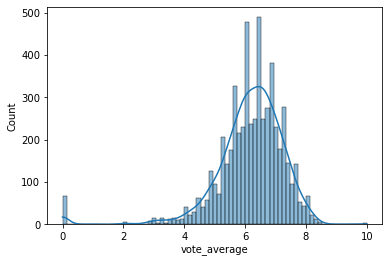

In [53]:
sns.histplot(df.vote_average, kde= True);

In [63]:
print('Percentual de avaliações altas (acima de 8):',
      round(df.vote_average[df.vote_average >= 8].count()/ df.shape[0] *100,2), '%', '\n',
      'Qtde de filmes com avaliação mínima (0):',df.vote_average[df.vote_average == 0].count(), '\n',
     'Qtde de filmes com avaliação máxima (10):',df.vote_average[df.vote_average == 10].count() )

Percentual de avaliações altas (acima de 8): 2.01 % 
 Qtde de filmes com avaliação mínima (0): 68 
 Qtde de filmes com avaliação máxima (10): 4


In [65]:
# verificando a quantidade de votos dos filmes com a nota máxima
df.vote_count[df.vote_average == 10]

4400    1.0
4926    1.0
5128    2.0
5543    1.0
Name: vote_count, dtype: float64

In [73]:
# verificando a quantidade de votos dos filmes com a nota mínima
df.loc[(df.vote_average == 0) & (df.vote_count > 0), 'id'].count()

1

Distribuição com assimetria negativa, os dados se concentram nos valores maiores. A maioria das notas estão abaixo de 6,9 (75%) e poucos filmes tem avaliações altas (acima de 8). Estes valores são uma média de cada filme, temos a quantidade de votos mas, não a distribuição destas, para saber se foram impactados por outliers. Esperava-se um número maior de notas altas, ja que há muitos filmes com alto orçamento, assim, este parece não influenciar nas avaliações. Dos filmes com notas altas, apenas 1 teve 2 votos, os outros só 1, o que impactou em um média de 10. Os de nota 0, exceto por 1 filme, obtiveram esta média por não haver avaliação, ou seja, para não ficar com valor nulo. Vamos complementar esta análise das notas observando a próxima variavél: vote_count.

In [75]:
df.vote_count.sample(5)

2203     605.0
3923    1049.0
2304     437.0
1279    1999.0
646      305.0
Name: vote_count, dtype: float64

In [76]:
df.vote_count.describe()

count     5663.000000
mean       790.749426
std       1467.069830
min          0.000000
25%         63.000000
50%        261.000000
75%        832.000000
max      22126.000000
Name: vote_count, dtype: float64

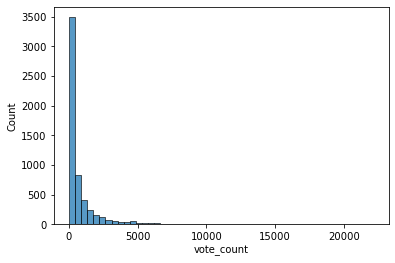

In [82]:
sns.histplot(df.vote_count, bins = 50);

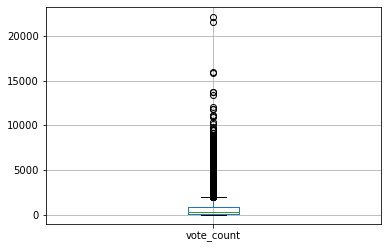

In [78]:
df.boxplot('vote_count');

In [84]:
df[df.vote_count == df.vote_count.max()]

,title,id,adult,budget,genres,homepage,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,keywords,cast,crew
70,Avengers: Endgame,299534,False,356000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,en,Avengers: Endgame,After the devastating events of Avengers: Infi...,229.59,...,2.797801e+09,181.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,8.278,22126.0,"[{'id': 3801, 'name': 'space travel'}, {'id': ...","[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 2, 'id': 37, 'know..."


In [98]:
df.vote_count.corr(df.vote_average, method = 'spearman')

0.4028214861205725

Muitos filmes apresentam poucos votos, no boxplot se observa o limite inferior bem próximo a média. O filme com maior quantidade de votos apresenta uma nota alta, se observando a correlação, a quantidade de votos pouco influencia na avaliação.

In [105]:
df.cast.sample(5)

4206    [{'adult': False, 'gender': 1, 'id': 515, 'kno...
667     [{'adult': False, 'gender': 2, 'id': 1187081, ...
5002    [{'adult': False, 'gender': 2, 'id': 382, 'kno...
5646    [{'adult': False, 'gender': 0, 'id': 1263111, ...
1666    [{'adult': False, 'gender': 1, 'id': 11701, 'k...
Name: cast, dtype: object

In [111]:
df.cast[0][:500]

"[{'adult': False, 'gender': 1, 'id': 1353827, 'known_for_department': 'Acting', 'name': 'Taylor Russell', 'original_name': 'Taylor Russell', 'popularity': 49.699, 'profile_path': '/3kW1SvpzyOPPZHxbz7cgR7ilmtQ.jpg', 'cast_id': 18, 'character': 'Zoey Davis', 'credit_id': '5b3c7655c3a368594a007ea4', 'order': 0}, {'adult': False, 'gender': 2, 'id': 116088, 'known_for_department': 'Acting', 'name': 'Logan Miller', 'original_name': 'Logan Miller', 'popularity': 9.828, 'profile_path': '/y3l1yJQw2Jqp8yq"

In [116]:
df[df.cast.isna()].isna().sum()

title                   0
id                      0
adult                   7
budget                  0
genres                  0
homepage                5
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 6
vote_average            0
vote_count              0
keywords                0
cast                    7
crew                    7
dtype: int64

É uma lista que contém dicionários com dados dos atores como nome, personagem, genêro, etc. Os dados nulos de elenco também não possui dados da produção.

In [117]:
df.crew.sample(5)

4694    [{'adult': False, 'gender': 2, 'id': 2774, 'kn...
601     [{'adult': False, 'gender': 2, 'id': 19464, 'k...
4572    [{'adult': False, 'gender': 0, 'id': 77125, 'k...
1986    [{'adult': False, 'gender': 2, 'id': 491, 'kno...
4287    [{'adult': False, 'gender': 2, 'id': 564, 'kno...
Name: crew, dtype: object

In [119]:
df.crew[0][:500]

"[{'adult': False, 'gender': 2, 'id': 6041, 'known_for_department': 'Sound', 'name': 'Brian Tyler', 'original_name': 'Brian Tyler', 'popularity': 5.475, 'profile_path': '/wLPLAOcEgA9vfNuXSX1QI1ajguU.jpg', 'credit_id': '5b36d5bf9251413c5803587b', 'department': 'Sound', 'job': 'Original Music Composer'}, {'adult': False, 'gender': 2, 'id': 8751, 'known_for_department': 'Editing', 'name': 'Steve Mirkovich', 'original_name': 'Steve Mirkovich', 'popularity': 5.509, 'profile_path': None, 'credit_id': '"

Mesma estrutura da coluna de elenco.